In [1]:
from numpy import *
from scipy import *
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
from matplotlib.pyplot import *

In [2]:
M = 20 # number of elements
d = 0.5 # element interspace in wavelengths
N = 1000 # number of samples in the realization
# The angle, power, and sample number of the signal of interest
phi_s = 0 # angle (deg)
P_s_db = 20 # signal power level (dB)
N_s = 100 # sample number of signal
# The angle in degrees of the single interference source
phi_i = 40
# The power levels of the signals and the noise
P_i_db = 50 # power of interference source (dB)

In [3]:
# Compute the array response vectors for the signal of interest and
# the interference
arr = mat(linspace(0, M-1, num=M))
arr = arr.T
v_s = exp(-1j*2*pi*d*arr*sin(phi_s*pi/180))/sqrt(M)
v_i = exp(-1j*2*pi*d*arr*sin(phi_i*pi/180))/sqrt(M)

In [4]:
# Generate one realization of the signal of interest, the interference,
# and the noise
x_s = mat(zeros((M, N))+1j*zeros((M,N)))
sig = power(10, (P_s_db/20))*v_s
x_s[:, N_s] = sig
x_i = power(10, (P_i_db/20))*dot(v_i, (random.randn(1,N) + 1j*random.randn(1,N))/sqrt(2))
x_n = (random.randn(M,N) + 1j*random.randn(M,N))/sqrt(2)

# Combine to get overall signal and interference-plus-noise signal
x = x_s + x_i + x_n
x_in = x_i + x_n

In [5]:
# Estimate the covariance matrix of the interference-plus-noise
R_in = (1/N)*dot(x_in, x_in.H)
# Compute SMI beamformer and normalize to MVDR
c_opt_unnorm = dot(R_in.I, v_s)
c_opt = c_opt_unnorm/dot(c_opt_unnorm.H, v_s)
# Compute the output signal
y_out = mat( dot(c_opt.H, x) )

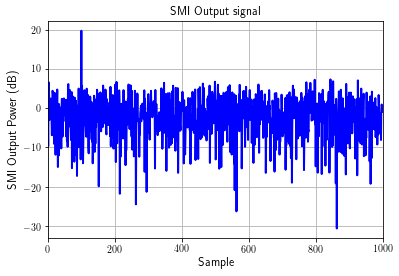

In [6]:
# Plot out the output signal in decibels
plt_axis = mat(linspace(0, N-1, N))
plot(plt_axis.getA1(), 20*log10(abs(y_out.getA1())),'b',linewidth=2)
xlabel('Sample',fontsize=12)
ylabel('SMI Output Power (dB)',fontsize=12)
title('SMI Output signal',fontsize=12)
xlim([0,1000]); # ylim([-5, 25])
grid()
show()

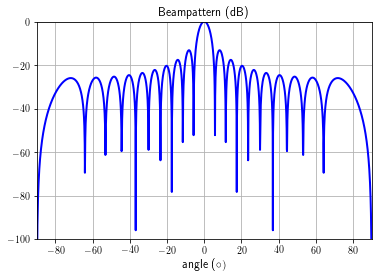

In [7]:
# beampattern
phi = mat(linspace(-90, 90, 1800))
c_smf = exp(-1j*2*pi*d*dot(arr, sin(phi*pi/180)))/sqrt(M)
C_b_p = dot(c_smf.H, v_s)
figure(2)
plot(phi.T, 20*log10(abs(C_b_p)),'b',linewidth=2)
xlabel(r'angle (^\circ)',fontsize=12)
title(r'Beampattern (dB)',fontsize=12)
xlim([-90, 90]);  ylim([-100, 0])
grid()
show()

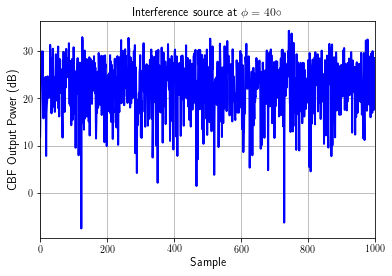

In [8]:
# CBF
c_bf = v_s
iy_cbf = mat( dot(c_bf.H, x) )

figure(3)
plot(plt_axis.getA1(), 20*log10(abs(iy_cbf.getA1())),'b',linewidth=2)
xlabel('Sample',fontsize=12)
ylabel('CBF Output Power (dB)',fontsize=12)
title(r"Interference source at \phi = "+ str(phi_i)+"^\circ",fontsize=12)
# title('CBF Output signal',fontsize=12)
xlim([0, 1000]); # ylim([-5, 25])
grid()
show()